![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
5110,id_5110,Madrid,NaN,6102.0,NaN,27.0,"[[], []]",/Restaurant_Review-g187514-d5884733-Reviews-Re...,d5884733,0,0.0
13764,id_399,London,"['Belgian', 'Bar', 'European', 'Pub', 'Vegetar...",400.0,$$ - $$$,594.0,[['Gets you out of the mayhem of Covent Garde....,/Restaurant_Review-g186338-d733545-Reviews-Low...,d733545,1,4.5
10762,id_1394,Dublin,['Chinese'],1398.0,NaN,2.0,"[['my local'], ['03/15/2016']]",/Restaurant_Review-g186605-d5812483-Reviews-Ex...,d5812483,1,4.5
21919,id_9,Barcelona,"['Pub', 'Latin', 'Bar', 'Street Food', 'Vegeta...",10.0,$,834.0,"[['Awesome place to eat and drink!!', 'Great F...",/Restaurant_Review-g187497-d5820228-Reviews-Th...,d5820228,1,4.5
9354,id_9354,Copenhagen,NaN,1590.0,NaN,12.0,"[['Very tasty running sushi!', 'Not expensive ...",/Restaurant_Review-g189541-d10240011-Reviews-D...,d10240011,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

In [16]:
# Используем столбцы Number of Reviews, Cuisine Style и Price Range
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
#data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [18]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

# Количество отсутствующих значений для признака 'Cuisine Style' велико, пока отметим их пометкой 'Other'
data['Cuisine Style'].fillna('Other', inplace = True)

# Заполним пропуски признака 'Reviews' значением [[], []] как самым часто встречающимся. В то же время оно самое нейтральное и может говорить об отсутствии отзывов.
data['Reviews'].fillna(data['Reviews'].mode()[0], inplace = True)

In [19]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                32639 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Price_Range_isNAN          50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(2)
memory usage: 4.3+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [20]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41857
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Price_Range_isNAN              2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [21]:
# Обработка Ranking
rest_count = data.groupby('City')['Restaurant_id'].count().to_dict()
data['Total count of restaurants'] = data['City'].map(rest_count)
data['Relative ranking'] = data['Ranking'] / data['Total count of restaurants']
# data.drop(['Ranking', 'rest_total_count'], axis = 1, inplace=True)

In [22]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [23]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [24]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [25]:
def price_range(cell):
    if pd.isna(cell):
        return 2
    elif cell == '$':
        return 1
    elif cell == '$$ - $$$':
        return 2
    elif cell == '$$$$':
        return 3

data['Price Range'] = data['Price Range'].apply(price_range)
# data = pd.get_dummies(data, columns=['Price Range', ])

In [26]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Restaurant_id                 50000 non-null object
Cuisine Style                 50000 non-null object
Ranking                       50000 non-null float64
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
Reviews                       50000 non-null object
URL_TA                        50000 non-null object
ID_TA                         50000 non-null object
sample                        50000 non-null int64
Rating                        50000 non-null float64
Number_of_Reviews_isNAN       50000 non-null uint8
Price_Range_isNAN             50000 non-null uint8
Total count of restaurants    50000 non-null int64
Relative ranking              50000 non-null float64
City_Amsterdam                50000 non-null uint8
City_Athens                   50000 non-null uint8
City_Barcelona                50000 non-null uint8
City_Berlin

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

Возьмем следующий признак "Restaurant_id".

In [27]:
data.Restaurant_id.nunique()

13094

Признак насчитывает 13094 уникальных значения, соответственно в списке присутствуют также сетевые рестораны. Создадим новый признак "chain" (и присвоим сетевым ресторанам значение "1").

In [28]:
net = data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts()>1].index.tolist()
data['Net'] = data[data.Restaurant_id.isin(net)].Restaurant_id.apply(lambda x: 1)
data['Net'] = data['Net'].fillna(0)

In [29]:
data['Net'].value_counts()

1.0    46193
0.0     3807
Name: Net, dtype: int64

In [30]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
Restaurant_id                 50000 non-null object
Cuisine Style                 50000 non-null object
Ranking                       50000 non-null float64
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
Reviews                       50000 non-null object
URL_TA                        50000 non-null object
ID_TA                         50000 non-null object
sample                        50000 non-null int64
Rating                        50000 non-null float64
Number_of_Reviews_isNAN       50000 non-null uint8
Price_Range_isNAN             50000 non-null uint8
Total count of restaurants    50000 non-null int64
Relative ranking              50000 non-null float64
City_Amsterdam                50000 non-null uint8
City_Athens                   50000 non-null uint8
City_Barcelona                50000 non-null uint8
City_Berlin

Возьмем следующий признак "Cuisine Style".

In [31]:
# выполним очистку от лишних символов
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace('[', ''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace(']', ''))

# подсчитаем кол-во кухонь в каждом ресторане 
# и запишем эту информацию в столбец 'Cuisine_Style_quantity'
data['Cuisine_Style_quantity'] = 0
n = 0
for i in data['Cuisine Style']:
    m = 0
    for j in i.split(', '):
        m += 1
    data['Cuisine_Style_quantity'][n] = m
    n += 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [32]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
Restaurant_id                 50000 non-null object
Cuisine Style                 50000 non-null object
Ranking                       50000 non-null float64
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
Reviews                       50000 non-null object
URL_TA                        50000 non-null object
ID_TA                         50000 non-null object
sample                        50000 non-null int64
Rating                        50000 non-null float64
Number_of_Reviews_isNAN       50000 non-null uint8
Price_Range_isNAN             50000 non-null uint8
Total count of restaurants    50000 non-null int64
Relative ranking              50000 non-null float64
City_Amsterdam                50000 non-null uint8
City_Athens                   50000 non-null uint8
City_Barcelona                50000 non-null uint8
City_Berlin

Возьмем следующий признак "Reviews".

Признак Reviews состоит из двух отзывов и двух дат. Создадим новый признак из разницы между датами отзывов.

In [33]:
# Обработка для Reviews
def reviews_to_list(string):
    if string == '[[], []]':
        return []
    else:
        string = string.replace(']]', '')
        string = string.replace("'", '')
        string = string.split('], [')[1]
        string = string.split(', ')
        return string
    
data['Reviews_date_temp'] = data['Reviews'].apply(reviews_to_list)

data['Reviews_date_first'] = data['Reviews_date_temp'].apply(
    lambda x: None if len(x) == 0
    else pd.to_datetime(x[0], format='%m/%d/%Y') if len(x) == 1
    else pd.to_datetime(x[0], format='%m/%d/%Y') if pd.to_datetime(x[0], format='%m/%d/%Y') < pd.to_datetime(x[1], format='%m/%d/%Y')
    else pd.to_datetime(x[1], format='%m/%d/%Y'))
data['Reviews_date_last'] = data['Reviews_date_temp'].apply(
    lambda x: None if len(x) == 0
    else pd.to_datetime(x[0], format='%m/%d/%Y') if len(x) == 1
    else pd.to_datetime(x[0], format='%m/%d/%Y') if pd.to_datetime(x[0], format='%m/%d/%Y') > pd.to_datetime(x[1], format='%m/%d/%Y')
    else pd.to_datetime(x[1], format='%m/%d/%Y'))

# Заполним пропуски в датах средними значениями для каждой категории: датой первого отзыва и датой последнего отзыва
min_date = data['Reviews_date_first'].mean()
max_date = data['Reviews_date_last'].mean()

# Заполним пропуски средней датой
data['Reviews_date_first'] = data['Reviews_date_first'].apply(
    lambda x: min_date if pd.isnull(x) else min_date if x == None else x)
data['Reviews_date_last'] = data['Reviews_date_last'].apply(
    lambda x: max_date if pd.isnull(x) else min_date if x == None else x)

# Создадим параметр date_delta - сколько дней прошло между первым и последним отзывом.
data['delta_days'] = (data['Reviews_date_last'] - data['Reviews_date_first']).dt.days

# Удалим лишние столбцы, на основе которых работали с датами.
data.drop(['Reviews_date_temp', 'Reviews_date_first','Reviews_date_last'], axis=1, inplace=True)

In [34]:
# Удаляем лишние столбцы
data.drop(['Restaurant_id','Cuisine Style','City_nan','Reviews','URL_TA',
        'ID_TA',],axis=1, inplace=True)

In [35]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
Ranking                       50000 non-null float64
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
sample                        50000 non-null int64
Rating                        50000 non-null float64
Number_of_Reviews_isNAN       50000 non-null uint8
Price_Range_isNAN             50000 non-null uint8
Total count of restaurants    50000 non-null int64
Relative ranking              50000 non-null float64
City_Amsterdam                50000 non-null uint8
City_Athens                   50000 non-null uint8
City_Barcelona                50000 non-null uint8
City_Berlin                   50000 non-null uint8
City_Bratislava               50000 non-null uint8
City_Brussels                 50000 non-null uint8
City_Budapest                 50000 non-null uint8
City_Copenhagen               50000 non-null uint8
City_Dublin     

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

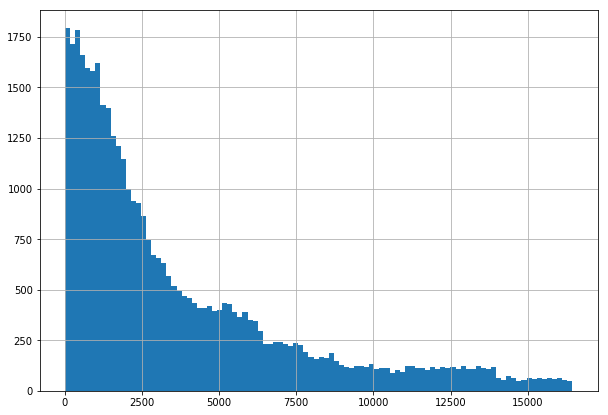

In [36]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

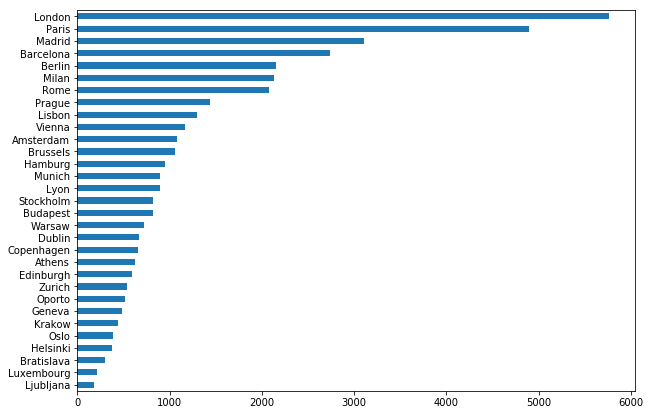

In [37]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

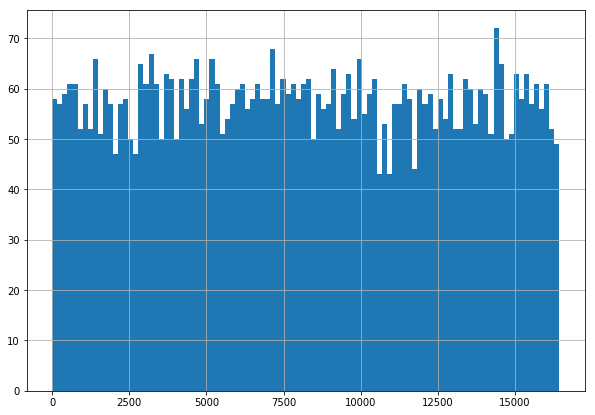

In [38]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

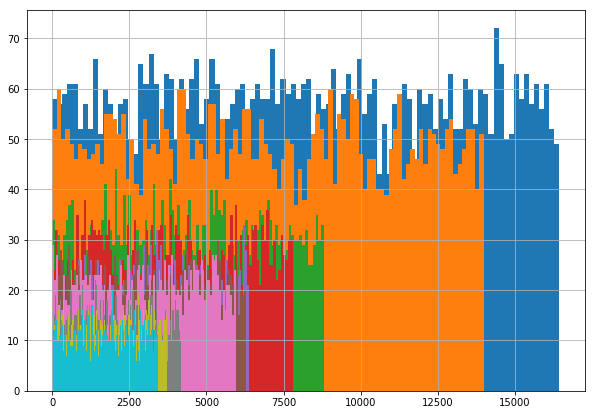

In [39]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

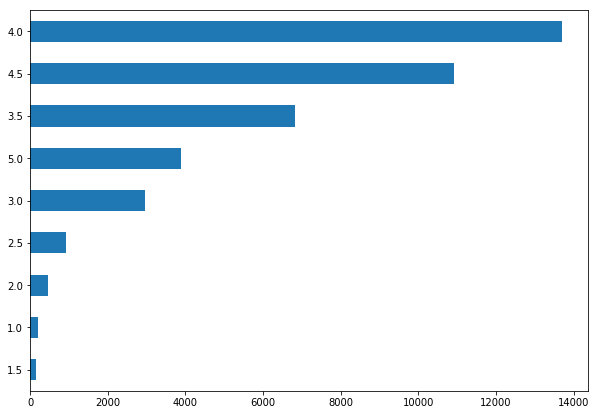

In [40]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

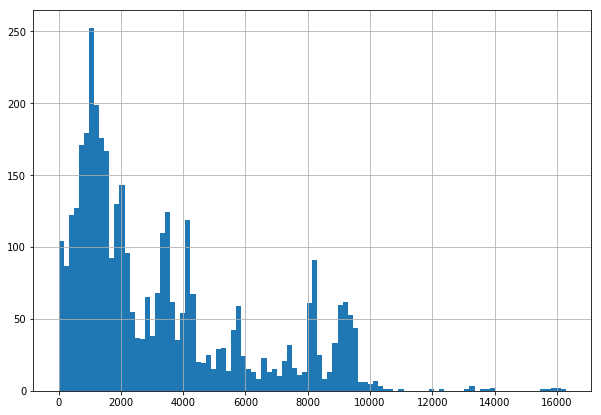

In [41]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

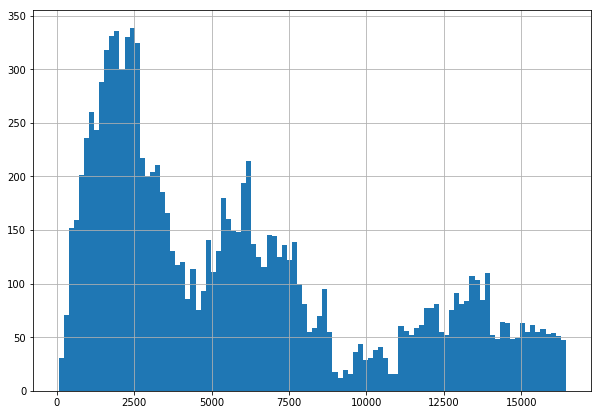

In [42]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

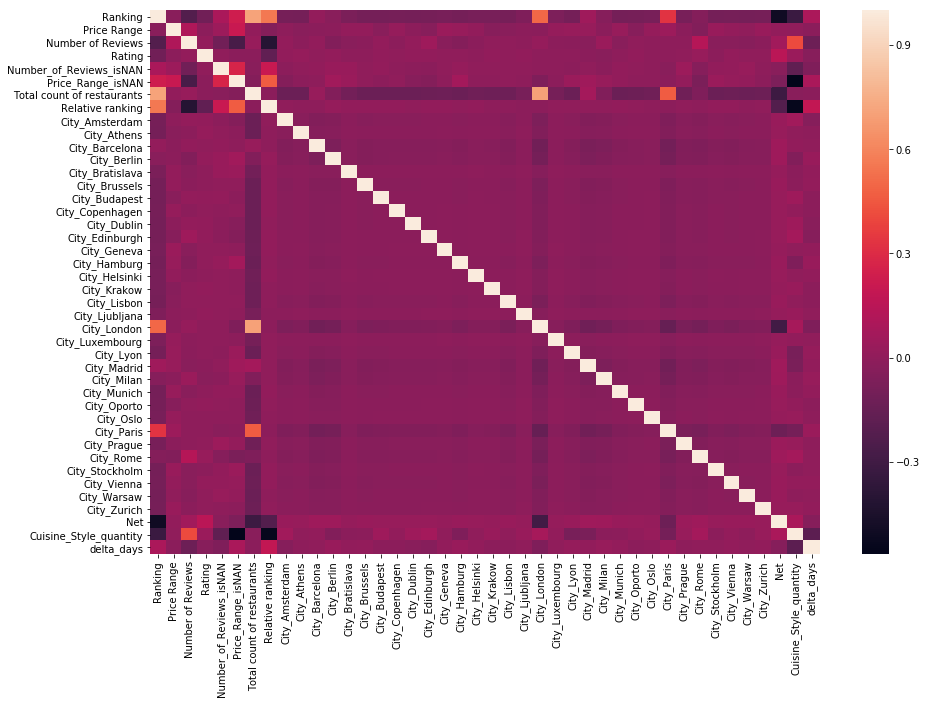

In [43]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [44]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [45]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # Перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Price Range_isNAN'] = pd.isna(df_output['Price Range']).astype('uint8')
        
    # ################### 1. Предобработка ############################################################## 
    # убираем ненужные для модели признаки
    df_output.drop(['ID_TA', 'URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(round(df_output['Number of Reviews'].mean()), inplace=True)
    # тут ваш код по обработке NAN
    #df_output['Cuisine Style'].fillna('Other', inplace = True)
    df_output['Reviews'].fillna(data['Reviews'].mode()[0], inplace = True)
    
    
    # ################### 3. Encoding ############################################################## 
    # Обработка Ranking
    rest_count = df_output.groupby('City')['Restaurant_id'].count().to_dict()
    df_output['Total count of restaurants'] = df_output['City'].map(rest_count)
    df_output['Relative ranking'] = df_output['Ranking'] / df_output['Total count of restaurants']
    # data.drop(['Ranking', 'rest_total_count'], axis = 1, inplace=True)
    
    
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    
    # Обработка Restaurant_id
    net = df_output.Restaurant_id.value_counts()[df_output.Restaurant_id.value_counts() > 1].index.tolist()
    df_output['Net'] = df_output['Restaurant_id'].apply(lambda x: 1 if x in net else 0)
    
    
    # Обработка price_range
    df_output['Price Range'] = df_output['Price Range'].apply(
        lambda x: 1 if x == '$' else 2 if x == '$$ - $$$' else 3 if x == '$$$$' else 2)
    #df_output = pd.get_dummies(df_output, columns=[ 'Price Range'], dummy_na=True)
    
    # Обработка cuisine_style
    df_output['Number_of_styles'] = df_output['Cuisine Style'].apply(lambda x: 1 if pd.isna(x)==True else len(x[1:-1].split(', ')) )
    
    # Обработка Reviews
    #посмотрми разницу в днях между первым и последним отзывом

    pattern2 = re.compile('[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]')

    def make_datelist(string_review):
        datelist = []
        for i in pattern2.findall(string_review):
            datelist.append(datetime.strptime(i, '%m/%d/%Y'))
        return datelist

    df_output['Reviews_dates'] = df_output.Reviews.fillna('').apply(lambda x: make_datelist(x))
    df_output['Reviews_dates_dif'] = df_output.apply(lambda x: (max(x['Reviews_dates']) - min(x['Reviews_dates'])).days if len(x['Reviews_dates'])==2 else 0,axis=1)
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
        
    
    # ################### 5. Clean #################################################### 
    #df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)#
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [46]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,Total count of restaurants,Relative ranking,City_Amsterdam,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Net,Number_of_styles,Reviews_dates_dif
47373,85.0,2,227.0,1,4.5,0,0,836,0.101675,0,...,0,0,0,0,0,0,0,1,8,16
35453,2084.0,2,124.0,1,5.0,1,1,1816,1.147577,0,...,1,0,0,0,0,0,0,1,1,0
8309,1645.0,2,14.0,0,0.0,0,0,1145,1.436681,0,...,0,0,0,0,0,0,0,1,1,0
22788,2345.0,3,91.0,1,4.0,0,0,2705,0.866913,0,...,0,0,0,0,0,0,0,1,4,208
11891,5475.0,2,27.0,1,3.5,0,0,2705,2.024030,0,...,0,0,0,0,0,0,0,1,1,106
4277,11078.0,2,16.0,0,0.0,0,1,6108,1.813687,0,...,0,0,0,0,0,0,0,1,1,0
30670,5548.0,2,15.0,1,4.5,0,1,6108,0.908317,0,...,0,0,0,0,0,0,0,1,1,131
6833,722.0,1,16.0,0,0.0,0,0,1186,0.608769,0,...,0,0,0,0,0,0,0,1,3,107
23505,1446.0,2,5.0,1,4.5,0,1,819,1.765568,0,...,0,0,0,0,0,0,0,1,1,308
34666,3016.0,2,62.0,1,4.0,0,0,6108,0.493779,0,...,0,0,0,0,0,0,0,1,2,234


In [47]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
Ranking                       50000 non-null float64
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
sample                        50000 non-null int64
Rating                        50000 non-null float64
Number_of_Reviews_isNAN       50000 non-null uint8
Price Range_isNAN             50000 non-null uint8
Total count of restaurants    50000 non-null int64
Relative ranking              50000 non-null float64
City_Amsterdam                50000 non-null uint8
City_Athens                   50000 non-null uint8
City_Barcelona                50000 non-null uint8
City_Berlin                   50000 non-null uint8
City_Bratislava               50000 non-null uint8
City_Brussels                 50000 non-null uint8
City_Budapest                 50000 non-null uint8
City_Copenhagen               50000 non-null uint8
City_Dublin     

In [48]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [49]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [50]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [51]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [52]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [53]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20570125


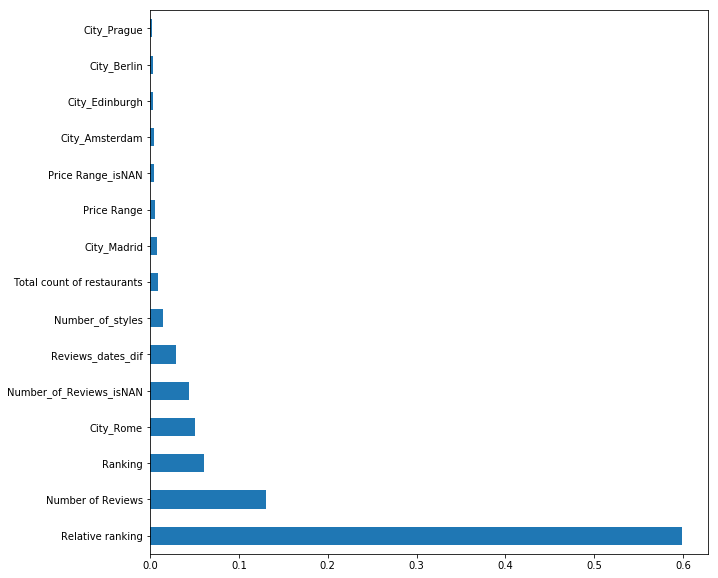

In [55]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [56]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,Total count of restaurants,Relative ranking,City_Amsterdam,City_Athens,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Net,Number_of_styles,Reviews_dates_dif
4631,3755.0,2,22.0,0.0,0,1,2694,1.393838,0,0,...,0,0,0,0,0,0,0,1,1,0
7558,67.0,2,236.0,0.0,0,0,819,0.081807,0,0,...,0,0,0,0,0,0,0,1,6,27
2839,5480.0,2,46.0,0.0,0,0,7193,0.761852,0,0,...,0,0,0,0,0,0,0,1,5,56
6370,11773.0,2,47.0,0.0,0,0,7193,1.636730,0,0,...,0,0,0,0,0,0,0,0,4,45
4359,1043.0,2,124.0,0.0,1,1,925,1.127568,0,0,...,0,0,0,0,1,0,0,1,1,0
4766,6673.0,2,2.0,0.0,0,1,3395,1.965538,0,0,...,0,0,0,0,0,0,0,1,1,0
8570,3911.0,2,71.0,0.0,0,0,1816,2.153634,0,0,...,1,0,0,0,0,0,0,1,6,13
61,1826.0,2,28.0,0.0,0,0,3395,0.537850,0,0,...,0,0,0,0,0,0,0,1,4,169
7102,451.0,2,136.0,0.0,0,0,925,0.487568,0,0,...,0,0,0,0,1,0,0,1,7,28
1877,943.0,2,6.0,0.0,0,1,925,1.019459,0,0,...,0,0,0,0,1,0,0,1,1,44


In [57]:
test_data = test_data.drop(['Rating'], axis=1)

In [58]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [59]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [60]:
predict_submission

array([3.105, 4.225, 4.445, ..., 3.06 , 4.505, 4.185])

In [61]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.105
1,id_1,4.225
2,id_2,4.445
3,id_3,4.265
4,id_4,4.450
5,id_5,4.490
6,id_6,3.235
7,id_7,2.315
8,id_8,4.105
9,id_9,4.680


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
